## Метрики

### **Среднее квадратическое отклонение или MSE (Mean Squared Error):**

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (a(x_i) - y_i) ^ 2 $$

$l$ - число объектов в выборке

Рассмотрим пример рассчета метрик, где модель предсказала 4 разных значения, а правильный ответ был всегда 10.


$$  MSE = \frac{1}{4} ((11 - 10)^ 2+ (9 - 10)^ 2 + (20 - 10)^ 2 + (1 - 10)^ 2)$$

$$ MSE = \frac{1}{4} (1 + 1 + 100 + 81) = 45.75 $$

### **Среднее абсолютное отклонение или MAE (Mean Absolute Error):**

$$ MAE = \frac{1}{l} \sum_{i=1}^{l} |a(x_i) - y_i| $$

$l$ - число объектов в выборке

$$ MAE = \frac{1}{4} (1 + 1 + 10 + 9) = 5.25 $$

### **Среднее абсолютное процентное отклонение или MAPE (Mean Absolute Percentage Error):**

Мы измеряли качество модели с помощью наиболее простой метрики Mean absolute error (MAE). Она измеряется в тех же единицах, что и целевая переменная, в нашем случае это число велосипедов. Но часто хочется иметь метрику в процентах. И, конечно, метрику легко модифицировать так, чтобы она принимала значения в процентах - получится Mean absolute percentage error (MAPE):

$$MAPE = \frac 1 N \sum_{n=1}^N \frac {|y_n-a(x_n)|}{|y_n|}$$

В данной формуле выполняется суммирование по объектам выборки, далее ошибка предсказания $|y_n-a(x_n)|$ на каждом объекте делится на модуль целевой переменной $|y_n|$. Получается, мы смотрим, на какой процент от той, величины, что мы хотим предсказать, модель в среднем ошибается. Вместо среднего можно использовать медиану для большей устойчивости к выбросам.

Однако, если у нас один из исходных $y_i$ будет равен 0, то метрика по такому наблюдению не посчитается. Так как мы не поделим на ноль.

$$ MAPE = \frac{1}{4} (0.1 + 0.1 + 1 + 0.9) = 0.525 $$

### **R² (коэффициент детерминации):**

Коэффициент детерминации в линейной регрессии измеряет долю дисперсии (разброс значений) зависимой переменной, которую модель может объяснить. Он принимает значения от 0 до 1, где 1 указывает на идеальное соответствие модели данным. Хотя если предсказание модели очень плохое, $R^2$ может принимать значения до $-∞$.

Формула для R² выглядит следующим образом:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \overline{y_i})^2}$$

Таким образом, R² измеряет, насколько хорошо модель соответствует данным, и чем ближе к 1, тем лучше моделью объясняется изменчивость зависимой переменной.

## Изучение данных

In [231]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

random_state = 42
test_size = 0.3

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

#print(data[data["Остаток к получению, тыс. руб."] > 110000000])
data.drop(data[data["Остаток к получению, тыс. руб."] > 110000000].index, inplace=True)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
#X = X.drop(columns=['Раздел 3', 'Заемные средства (1410)', 'Себестоимость', 'Прибыль от продаж', 'Прибыль до налогооблажения']) # Лишние признаки по heatmap
X = X.drop(columns=['Сумма договоров, тыс. руб.']) # Важный параметр, но его сложно "добыть", т.к. он расчитывается по отчетным формам клиентов
Y = data["Остаток к получению, тыс. руб."]

Y = np.log(Y[Y != 0])

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

print("X shape = ", X.shape)
print("Y shape = ", Y.shape)

# выводим первые пять строчек
#print('data.head(): ', data.head())
# число строк, число столбцов
#print('data.shape: ', data.shape)
#print('data.info(): ', data.info())
#print('X.describe().T: ', X.describe().T)

#print(Y_train)
#print(Y.describe().T)


X shape =  (95, 16)
Y shape =  (95,)


(95, 2)


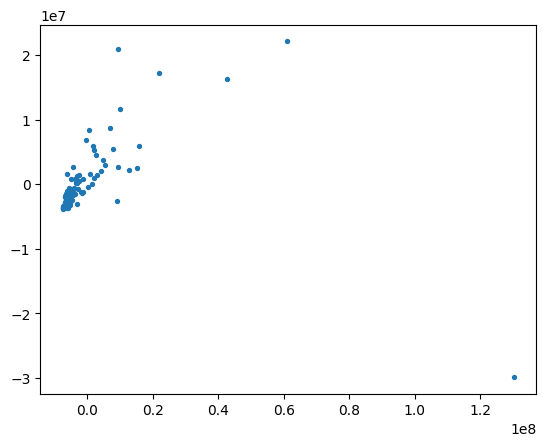

(array([[ 0., 76., 15.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
        [ 1., 75., 17.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([-2.98835131e+07, -1.38779111e+07,  2.12769095e+06,  1.81332930e+07,
         3.41388950e+07,  5.01444970e+07,  6.61500991e+07,  8.21557011e+07,
         9.81613031e+07,  1.14166905e+08,  1.30172507e+08]),
 <a list of 2 BarContainer objects>)

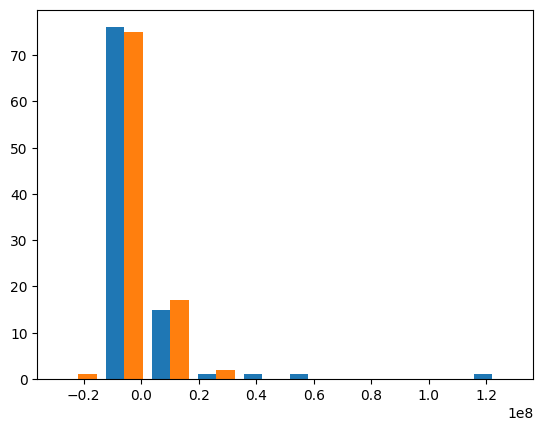

In [232]:
# См Clustering_base.ipynb (PCA) + Модуль 1, День 3, Кластеризация + Практика

from sklearn.decomposition import PCA

# Задаем класс PCA и указываем там параметр количества главных компонент равный 2
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X) # Обучаем и трансформируем данные
print(X_reduced.shape)
#print(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=8)
plt.show()

plt.hist(X_reduced, bins=10)

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


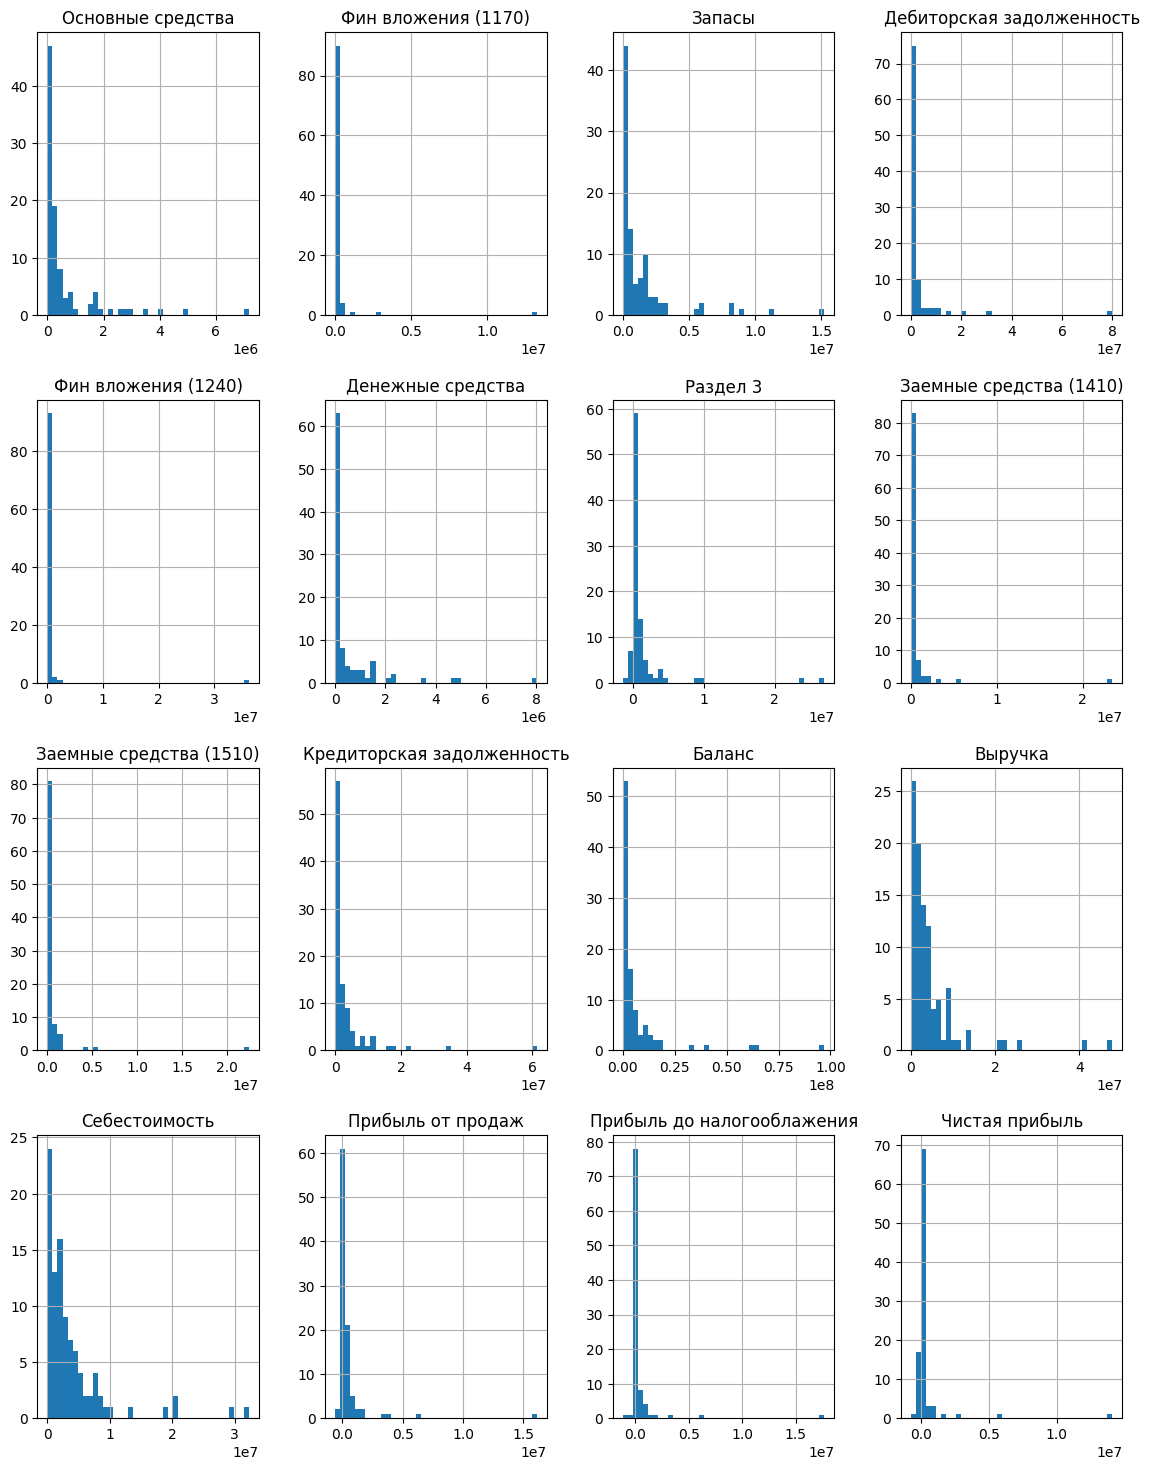

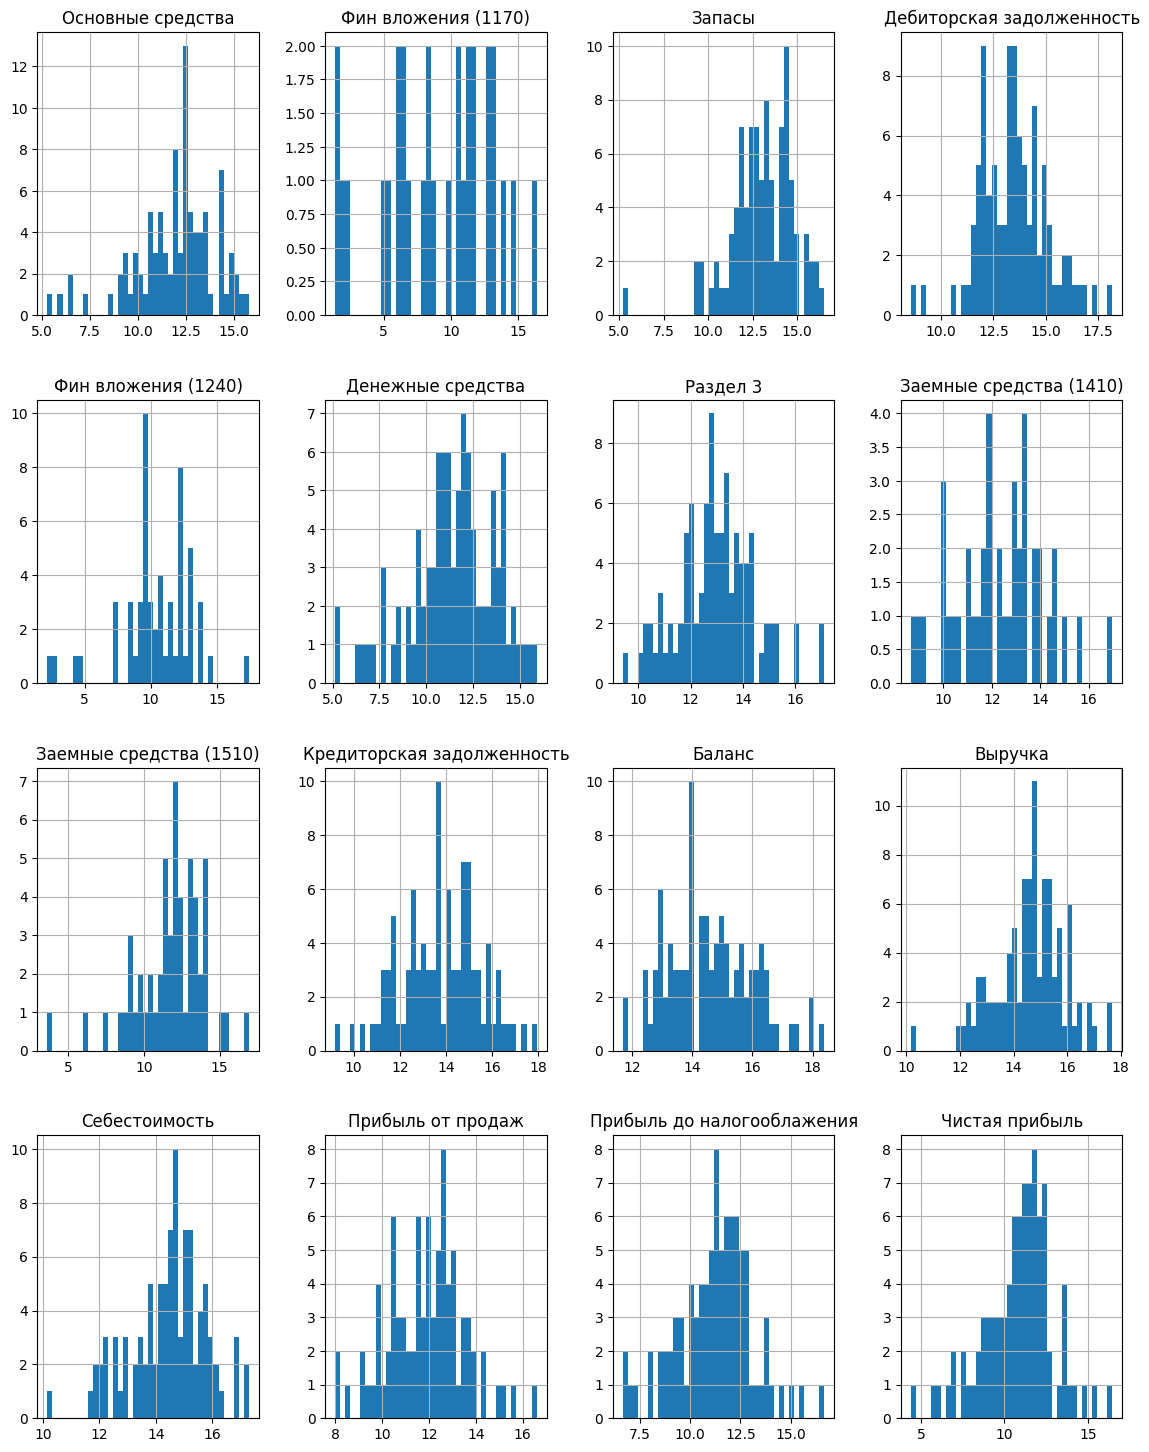

In [199]:
X.hist(figsize=(14, 18), bins=40);

# Диаграмы сильно смещены, поэтому можем прлогарифмировать значения, чтобы распределения стали больше похоже на нормальные
# При этом нужно избавиться от нулей
(np.log(X[X != 0])).hist(figsize=(14, 18), bins=40);

{'whiskers': [<matplotlib.lines.Line2D at 0x7801ca5cd6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7801ca5cf650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7801ca5ce590>,
 'medians': [<matplotlib.lines.Line2D at 0x7801cb1466d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7801cb146110>,
 'means': []}

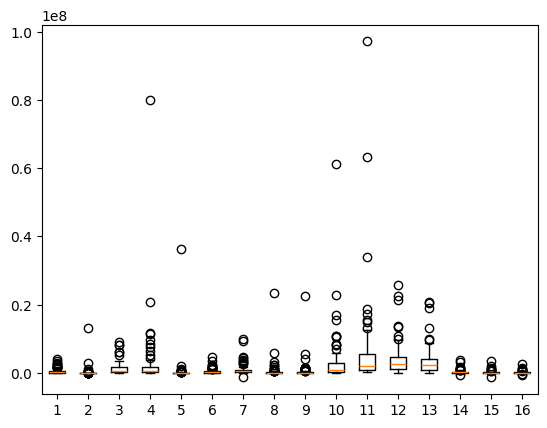

In [233]:
plt.boxplot(X)

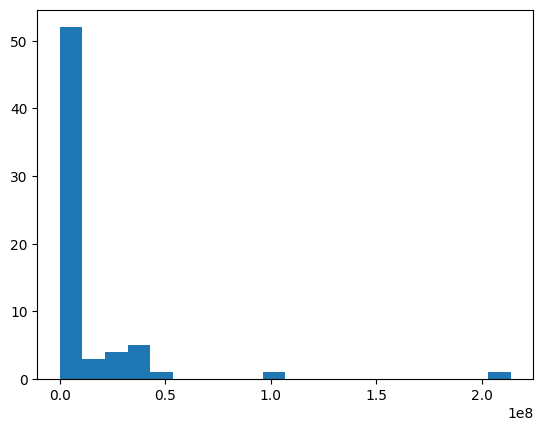

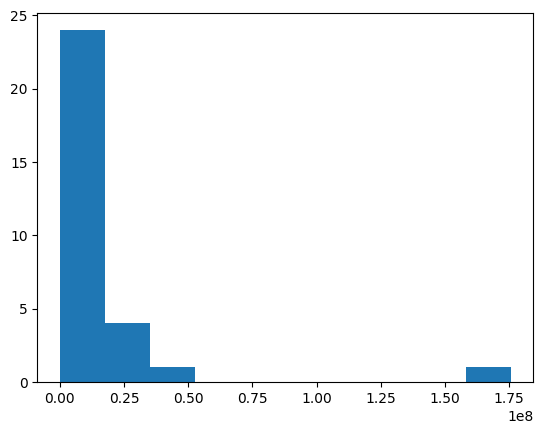

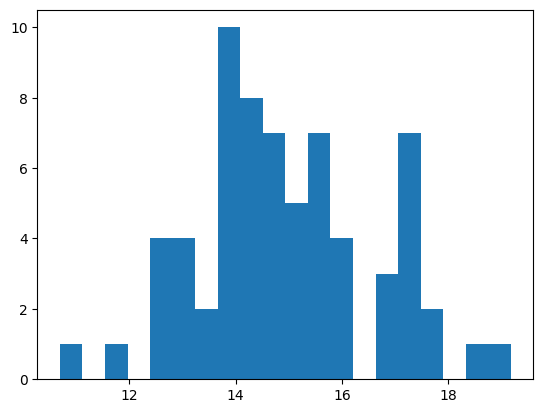

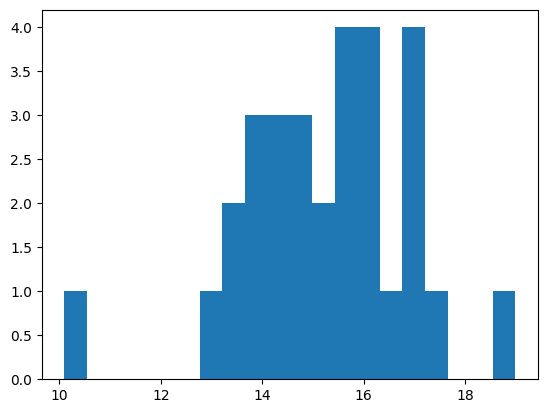

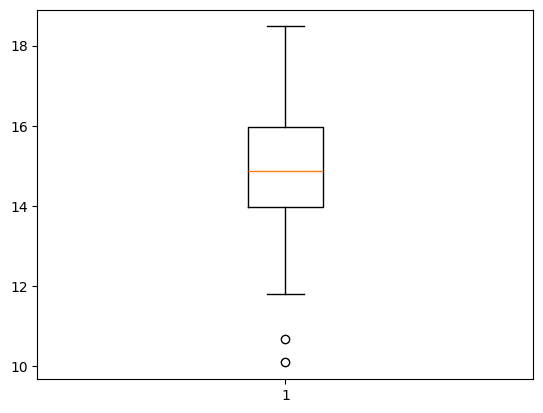

<Axes: >

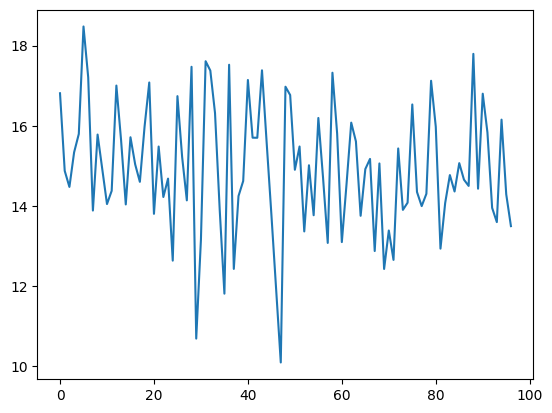

In [235]:
# Изучение распределения целевой переменной

plt.hist((Y_train), bins=20)
plt.show()

plt.hist((Y_test), bins=10)
plt.show()

# Целевая переменная зависит от признака по экспоненциальному закону.  Диаграмма остатков сильно смещена.
# Чтобы исправить ситуацию, можем прологарифмировать Y

plt.hist(np.log(Y_train[Y_train != 0]), bins=20)
plt.show()

plt.hist(np.log(Y_test[Y_test != 0]), bins=20)
plt.show()

plt.boxplot(Y)
plt.show()

Y.plot()

In [195]:
import statsmodels.api as sm

# включить в модель свободный член
X_train_with_const = sm.add_constant(X_train)

# Обучение модели линейной регрессии с использованием statsmodels
lin_reg_sm = sm.OLS(Y_train, X_train_with_const).fit()

# Вывод статистического отчета
print(lin_reg_sm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Остаток к получению, тыс. руб.   R-squared:                       0.982
Model:                                        OLS   Adj. R-squared:                  0.976
Method:                             Least Squares   F-statistic:                     171.9
Date:                            Sat, 07 Jun 2025   Prob (F-statistic):           5.83e-38
Time:                                    15:33:01   Log-Likelihood:                -1113.7
No. Observations:                              67   AIC:                             2261.
Df Residuals:                                  50   BIC:                             2299.
Df Model:                                      16                                         
Covariance Type:                        nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.

(12.5, -0.5)

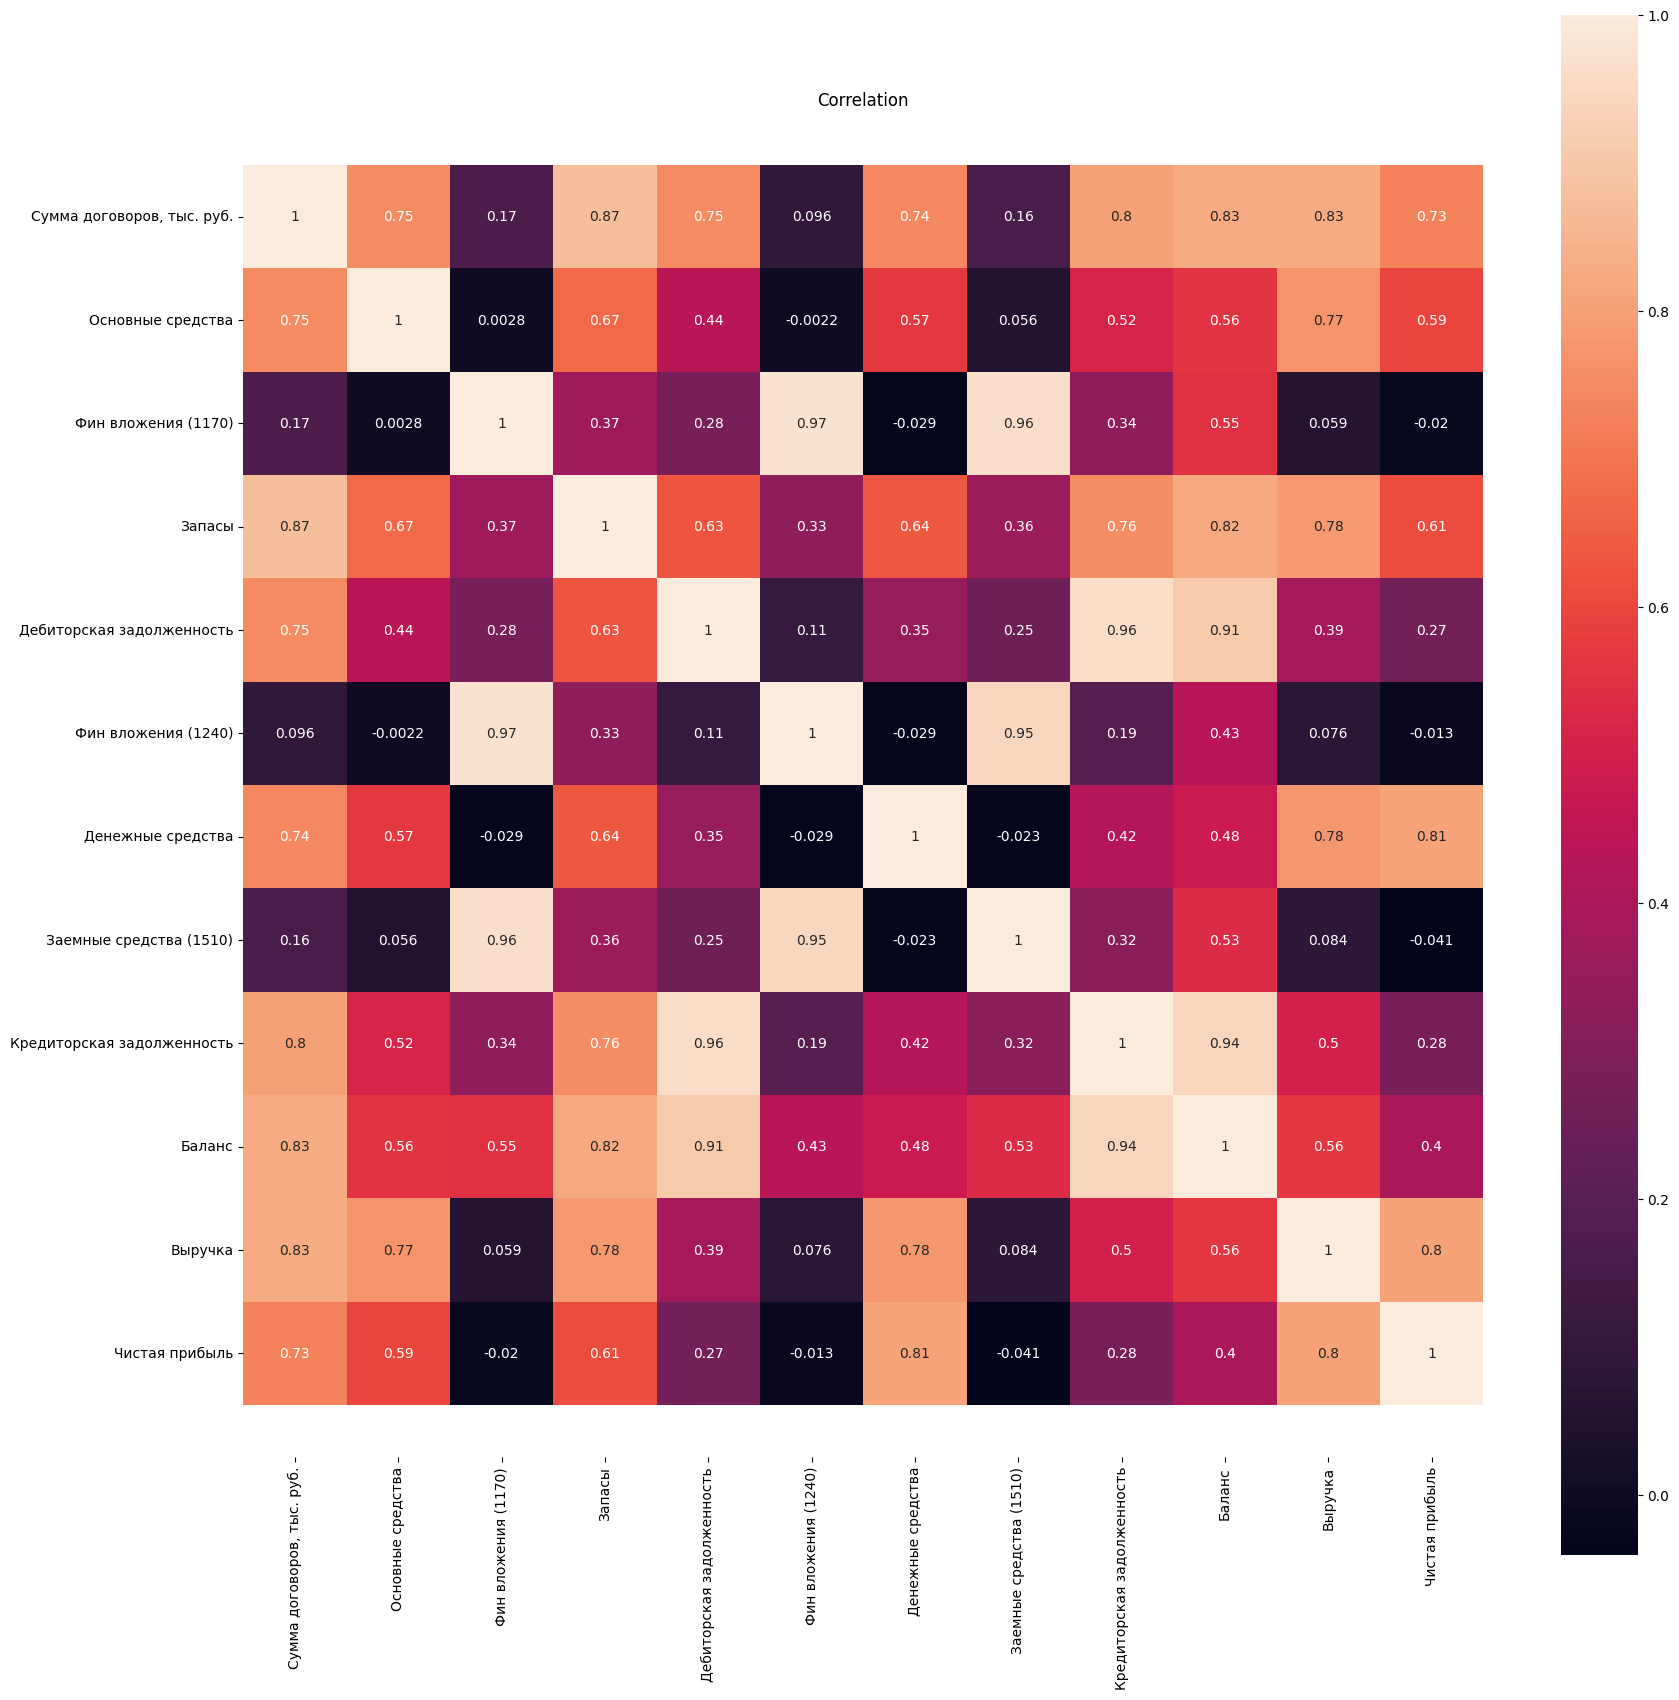

In [167]:
import seaborn as sns

corr = X.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation')
ax=sns.heatmap(corr, annot=True, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Смотрим какие признаки сильно коррелирую друг с другом и удаляем лишние

#X = X.drop(columns=['Раздел 3', 'Заемные средства (1410)', 'Себестоимость', 'Прибыль от продаж', 'Прибыль до налогооблажения']) # Лишние признаки по heatmap

## Линейная регрессия

**Линейная модель** суммирует значения всех признаков с некоторыми весами.

**Веса $w_i$ при признаках** - параметры, которые необходимо настраивать в процессе обучения

$$
a(x) = w_0 + w_1 \cdot x_1 + ... + w_d \cdot x_d
$$

где $d$ - число признаков.

In [219]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Гипер параметры
#random_state = 0 # 0.79
random_state = 42 # 0.92
test_size = 0.3

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
#X = X.drop(columns=['Раздел 3', 'Заемные средства (1410)', 'Себестоимость', 'Прибыль от продаж', 'Прибыль до налогооблажения']) # Лишние признаки по heatmap
X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]
#Y = np.log(Y[Y != 0])

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

#print('X_train.shape: ', X_train.shape)
#print('X_test.shape: ', X_test.shape)

model = LinearRegression() # определяем модель
model.fit(X_train, Y_train) # обучаем модель на обучающей выборке

#print('model.coef_:', model.coef_)
#print('model.intercept_:', model.intercept_)

# предсказываем значения целевой переменной для обучающей выборки
preds_train = model.predict(X_train)

# предсказываем значение целевой переменной для тестовой выборки
preds_test = model.predict(X_test)

#print('preds_test[:10]: ', preds_test[:10]) # выведем значения с первого по десятое
# выводим первые десять значений целевой переменной тестовой выборки
#print('Y_test[:10].values: ', Y_test[:10].values)

print('MSE train: ', mean_squared_error(Y_train, preds_train))
print('MSE test:  ', mean_squared_error(Y_test, preds_test))
print('RMSE train: ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, preds_test)))
print('MAE train: ', mean_absolute_error(Y_train, preds_train))
print('MAE test:  ', mean_absolute_error(Y_test, preds_test))
print('MAPE train: ', mean_absolute_percentage_error(Y_train, preds_train))
print('MAPE test:  ', mean_absolute_percentage_error(Y_test, preds_test))
print('R^2 train: ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))
r2_score_train_lr = r2_score(Y_train, preds_train)
r2_score_test_lr = r2_score(Y_test, preds_test)

weights_data = {
    "веса":model.coef_,
    "признаки": X.columns
}

# задаем с помощью словаря веса и признаки модели
weights = pd.DataFrame(weights_data) # преобразовываем признаки с весами в таблицу
weights_lr = weights
weights.sort_values("веса") # сортируем полученную таблицу

MSE train:  16034388065170.121
MSE test:   134597892464653.44
RMSE train:  4004296.2009784095
RMSE test:   11601633.180921271
MAE train:  2554078.1132693565
MAE test:   7128668.832761148
MAPE train:  1.26181340817806
MAPE test:   1.9794634257389168
R^2 train:  0.9821498183876508
R^2 test:   0.8652922777401194


,веса,признаки
14,-35.182047,Прибыль до налогооблажения
10,-5.465797,Баланс
13,-2.114280,Прибыль от продаж
1,-1.285243,Фин вложения (1170)
11,-0.873960,Выручка
12,0.848365,Себестоимость
7,1.440410,Заемные средства (1410)
4,1.748961,Фин вложения (1240)
0,2.894762,Основные средства
9,3.420608,Кредиторская задолженность


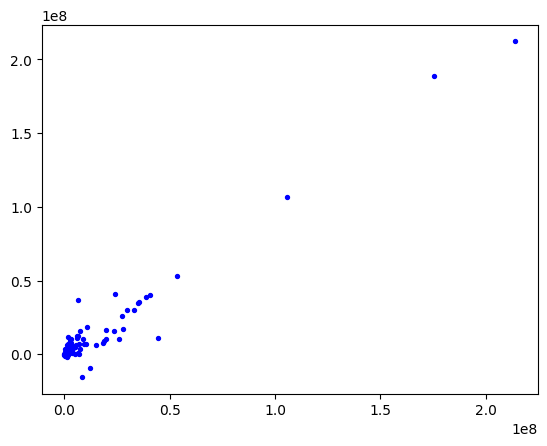

In [222]:
# Предсказания на трейне
plt.scatter(Y_train, preds_train, s=8, color='blue')
#plt.show()

# Предсказания на тесте
plt.scatter(Y_test, preds_test, s=8, color='blue')
plt.show()

# Предсказания на тесте
#plt.scatter(Y_train + Y_test, preds_train + preds_test, s=8)
#plt.show()

Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 1.6677394	total: 2.33ms	remaining: 464ms
5:	learn: 1.6587670	total: 2.71ms	remaining: 448ms
6:	learn: 1.6494867	total: 3.11ms	remaining: 441ms
7:	learn: 1.6404349	total: 3.46ms	remaining: 429ms
8:	learn: 1.6311226	total: 3.97ms	remaining: 437ms
9:	learn: 1.6228348	total: 4.34ms	remaining: 430ms
10:	learn: 1.6144369	total: 4.72ms	remaining: 424ms
11:	learn: 1.6065184	total: 5.09ms	remaining: 419ms
12:	learn: 1.5974942	total: 5.43ms	remaining: 412ms
13:	learn: 1.5883942	total: 5.81ms	remaining: 409ms
14:	learn: 1.5808719	total: 6.21ms	remaining: 408ms
15:	learn: 1.5734970	total: 6.62ms	remaining: 407ms
16:	learn: 1.5654815	total: 7ms	remaining: 405ms
17:	learn: 1.5600514	total: 7.37ms	remaining: 402ms
18:	learn: 1.5538512	total: 7.72ms	remaining: 399ms
19:	learn: 1.5467436	total: 8.1ms	remaining: 397ms
20:	learn: 1.5396303	total: 8.49ms	remaining: 396ms
21:	learn: 1.5315660	total: 8.84ms	remaining: 393ms
22:	le

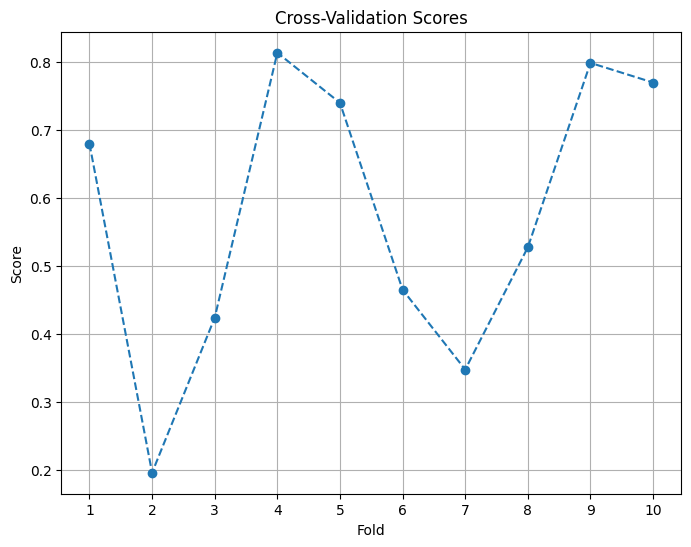

In [206]:
from sklearn.model_selection import cross_val_score

# Выполняем кросс-валидацию
# cv - количество фолдов (разбиений данных)
scores = cross_val_score(model, X, Y, cv=10, scoring='r2')

# Выводим результаты
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

# Отрисовываем результаты
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-Validation Scores')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)
plt.show()

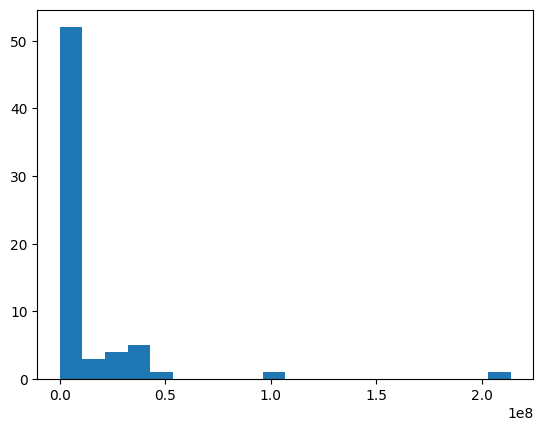

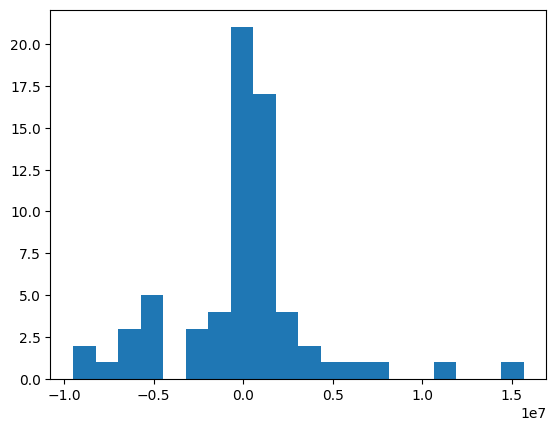

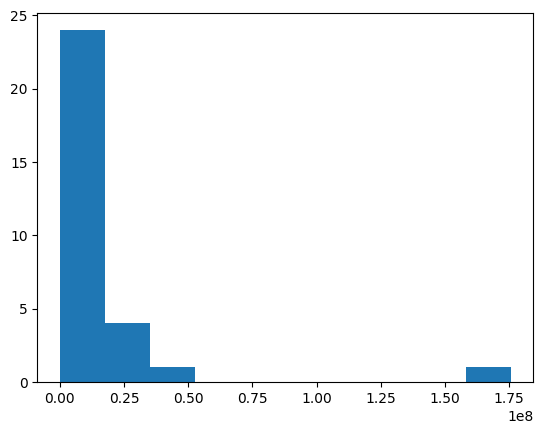

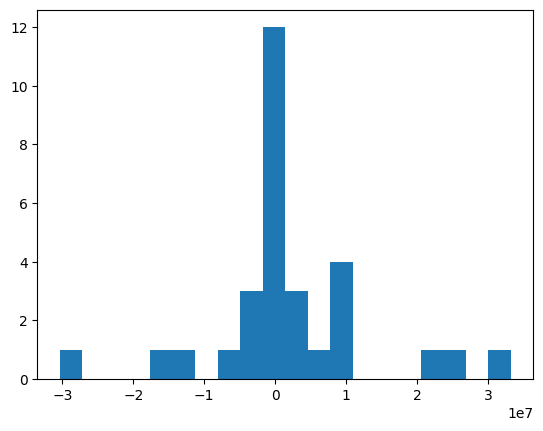

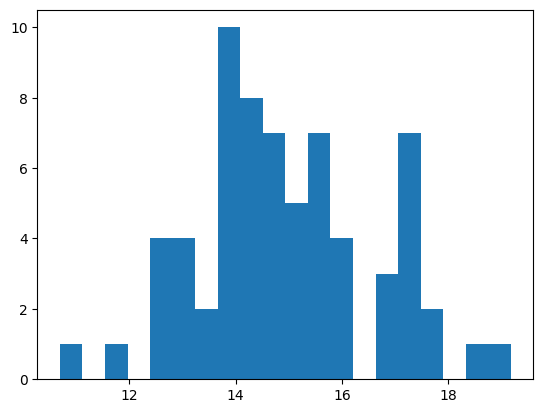

In [174]:
plt.hist((Y_train), bins=20)
plt.show()

plt.hist((Y_train-preds_train), bins=20)
plt.show()

plt.hist((Y_test), bins=10)
plt.show()

plt.hist((Y_test-preds_test), bins=20)
plt.show()

# Целевая переменная зависит от признака по экспоненциальному закону.  Диаграмма остатков сильно смещена.
# Чтобы исправить ситуацию, можем прологарифмировать Y

plt.hist(np.log(Y_train[Y_train != 0]), bins=20)
plt.show()

## Градиентный спуск

Градиентный спуск — это алгоритм оптимизации, который используется для нахождения минимума функции. Основная идея заключается в следующем: чтобы минимизировать функцию, мы будем двигаться в направлении, противоположном градиенту этой функции. Градиент показывает направление наибольшего возрастания функции, поэтому движение в противоположном направлении будет приводить к её уменьшению.

На каждом шаге алгоритм обновляет параметры модели в направлении, противоположном градиенту функции потерь, с умножением на заданный коэффициент обучения. Это продолжается до тех пор, пока изменение функции потерь не станет достаточно малым или не будет достигнуто максимальное количество итераций.

Одним из самых важных гиперпараметров градиентного спуска является `learning rate` (скорость обучения). Подбор оптимального learning rate в методе градиентного спуска критически важен. Learning rate определяет шаг, на который модель будет обновлять свои параметры на каждой итерации. Если learning rate слишком мал, сходимость может быть слишком медленной, требуя большого количества итераций. Если же learning rate слишком велик, модель может не сойтись к оптимальному решению и расходиться.

Оптимально подобранный learning rate позволяет градиентному спуску быстро сойтись к оптимальному решению, ускоряя обучение модели, и при этом обеспечивает устойчивость процесса обновления параметров.

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Гипер параметры
#random_state = 0
random_state = 42
test_size = 0.3
learning_rate = 0.1
n_iterations = 10000 # 0.94
#n_iterations = 100000 # 0.93

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Добавим столбец для свободного члена в начало
X_train_scaled = np.hstack([
    np.ones((X_train_scaled.shape[0], 1)), X_train_scaled
])

X_test_scaled = np.hstack([
    np.ones((X_test_scaled.shape[0], 1)), X_test_scaled
])

# Зададим гиперпараметры
m = X_train_scaled.shape[0] # количество объектов
n = X_train_scaled.shape[1] # количество признаков

# Случайно инициализируем веса
np.random.seed(42)
weights = np.random.randn(n)

# Запустим алгоритм градиентного спуска
for iteration in range(n_iterations):
    predictions = X_train_scaled.dot(weights) # предсказания
    errors = predictions - Y_train # ошибка

    # вычисляем направление спуска (grad_f(x))
    gradients = 1/m * X_train_scaled.T.dot(errors)
    weights -= learning_rate * gradients # обновляем значение в точке

# Получим предсказания
Y_pred = X_test_scaled.dot(weights)

print('MSE test:  ', mean_squared_error(Y_test, Y_pred))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE test:  ', mean_absolute_error(Y_test, Y_pred))
print('R^2 test:  ', r2_score(Y_test, Y_pred))
r2_score_test_gd = r2_score(Y_test, preds_test)

MSE test:   168790765038506.78
RMSE test:   12991950.00908281
MAE test:   7784980.335126178
R^2 test:   0.8310715043119195


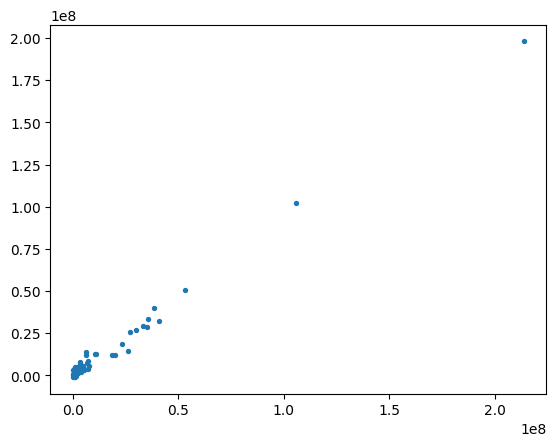

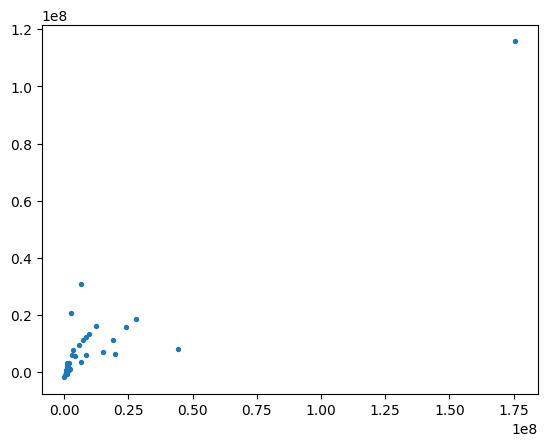

In [210]:
# Предсказания на трейне
plt.scatter(Y_train, preds_train, s=8)
plt.show()

# Предсказания на тесте
plt.scatter(Y_test, preds_test, s=8)
plt.show()

Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 1.6677394	total: 2.03ms	remaining: 404ms
5:	learn: 1.6587670	total: 2.41ms	remaining: 399ms
6:	learn: 1.6494867	total: 2.77ms	remaining: 393ms
7:	learn: 1.6404349	total: 3.1ms	remaining: 385ms
8:	learn: 1.6311226	total: 3.43ms	remaining: 377ms
9:	learn: 1.6228348	total: 3.8ms	remaining: 377ms
10:	learn: 1.6144369	total: 4.17ms	remaining: 375ms
11:	learn: 1.6065184	total: 4.53ms	remaining: 373ms
12:	learn: 1.5974942	total: 4.86ms	remaining: 369ms
13:	learn: 1.5883942	total: 5.18ms	remaining: 365ms
14:	learn: 1.5808719	total: 5.56ms	remaining: 365ms
15:	learn: 1.5734970	total: 5.93ms	remaining: 365ms
16:	learn: 1.5654815	total: 6.31ms	remaining: 365ms
17:	learn: 1.5600514	total: 6.67ms	remaining: 364ms
18:	learn: 1.5538512	total: 7.04ms	remaining: 364ms
19:	learn: 1.5467436	total: 7.43ms	remaining: 364ms
20:	learn: 1.5396303	total: 7.8ms	remaining: 364ms
21:	learn: 1.5315660	total: 8.18ms	remaining: 364ms
22:	l

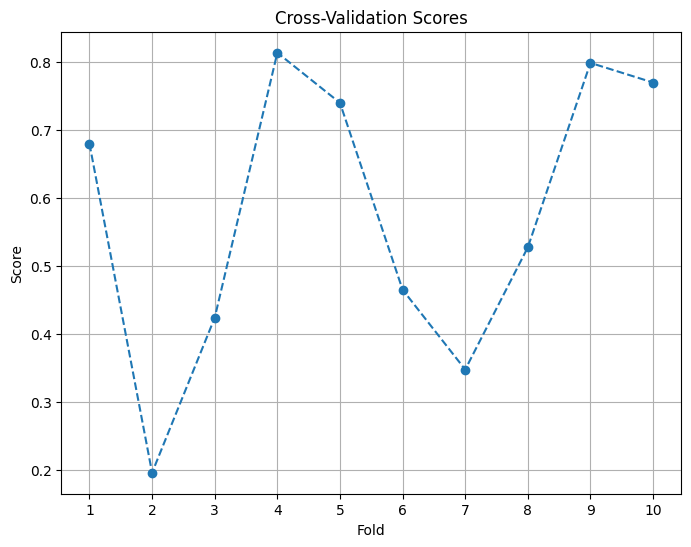

In [204]:
from sklearn.model_selection import cross_val_score

# Выполняем кросс-валидацию
# cv - количество фолдов (разбиений данных)
scores = cross_val_score(model, X, Y, cv=10, scoring='r2')

# Выводим результаты
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

# Отрисовываем результаты
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-Validation Scores')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)
plt.show()

## Метод Lasso

Чтобы бороться с возможным переобучением линейных моделей можно использовать модели с ***регуляризацией***. Ключевой признак переобучения линейной модели - большие веса при нормализированных признаках. Давайте будем штрафовать модели за большие веса.

В линейных моделях есть специальные модификации для борьбы с переобучением, называемые *Ridge* и *Lasso*.

Модель **Lasso** прибавляет к нашей функции ошибок штраф, основанный на сумме абсолютных значений коэффициентов модели.

$$Lasso Loss = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \alpha\sum_{j=1}^{m}|w_j|$$

В свою очередь, модель **Ridge** использует штраф, основанный на сумме квадратов весов.


$$Ridge Loss = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \alpha\sum_{j=1}^{m}w_j^2$$

Величина штрафа регулируется через коэффициент **$\alpha$**.

**Lasso** и **Ridge** во время обучения требуют, чтобы не только ошибка на обучающих данных была как можно ниже, но и чтобы веса были как можно более близки к нулю и чтобы часть из них приняла нулевые значения. А если какой-то признак умножается на нулевой вес, это равносильно удалению этого признака. Давайте применим этот механизм к нашим данным и посмотрим, какие признаки отберет модель.

Импортируем модель `Lasso`, выполним обучение, предсказание и оценку ошибки:

Перед использованием `Lasso` регрессии необходимо стандартизировать признаки, чтобы все они были в одинаковых единицах измерения. Для этого будем использовать `StandardScaler` из sklearn!

In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

### Гипер параметры
#random_state = 0
#random_state = 42
random_state = 23643
test_size = 0.3
#alpha = 10000 # 0.94
alpha = 100000 # 0.9596

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Lasso(alpha=alpha) #определяем модель
model.fit(X_train_scaled, Y_train) #обучаем модель
preds_train = model.predict(X_train_scaled) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test_scaled) #делаем предсказание для тестовых данных

print('MSE train: ', mean_squared_error(Y_train, preds_train))
print('MSE test:  ', mean_squared_error(Y_test, preds_test))
print('RMSE train: ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, preds_test)))
print('MAE train: ', mean_absolute_error(Y_train, preds_train))
print('MAE test:  ', mean_absolute_error(Y_test, preds_test))
print('R^2 train: ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))
r2_score_train_lasso = r2_score(Y_train, preds_train)
r2_score_test_lasso = r2_score(Y_test, preds_test)

print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

weights_data = {"веса":model.coef_,\
                "признаки": X_train.columns}
weights = pd.DataFrame(weights_data)
#print(weights.sort_values("веса"))
print(weights)

weights_lasso = weights;


MSE train:  56199133663312.586
MSE test:   47318967058554.42
RMSE train:  7496608.143908323
RMSE test:   6878878.328517987
MAE train:  4477628.530717694
MAE test:   3839670.017965657
R^2 train:  0.9371036288629668
R^2 test:   0.9528552646448853
Число активных признаков: 13 / 16
            веса                    признаки
0   1.748936e+06           Основные средства
1  -3.398146e+06         Фин вложения (1170)
2   7.037078e+06                      Запасы
3   5.191807e+06   Дебиторская задолженность
4  -0.000000e+00         Фин вложения (1240)
5   3.166720e+06           Денежные средства
6   9.203389e+06                    Раздел 3
7  -4.437852e+06     Заемные средства (1410)
8   1.081842e+07     Заемные средства (1510)
9   8.585190e+05  Кредиторская задолженность
10  0.000000e+00                      Баланс
11  0.000000e+00                     Выручка
12  1.046196e+06               Себестоимость
13 -3.713401e+06           Прибыль от продаж
14 -2.128782e+07  Прибыль до налогооблажения
1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+13, tolerance: 5.987e+12
  model = cd_fast.enet_coordinate_descent(


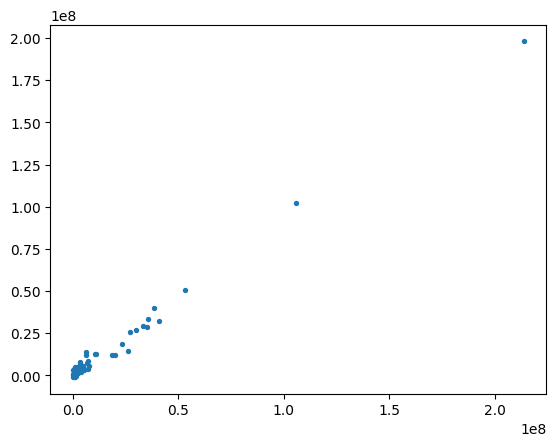

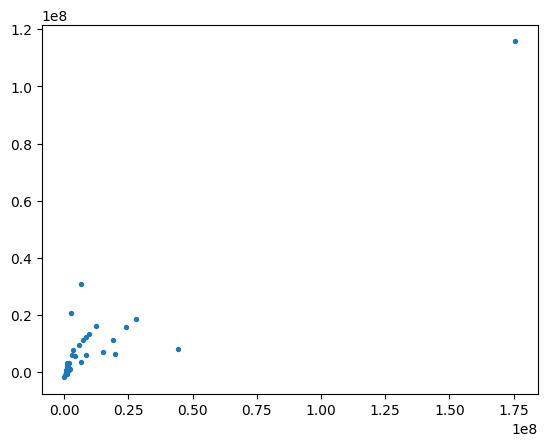

In [211]:
# Предсказания на трейне
plt.scatter(Y_train, preds_train, s=8)
plt.show()

# Предсказания на тесте
plt.scatter(Y_test, preds_test, s=8)
plt.show()

array([[<Axes: title={'center': 'веса'}>]], dtype=object)

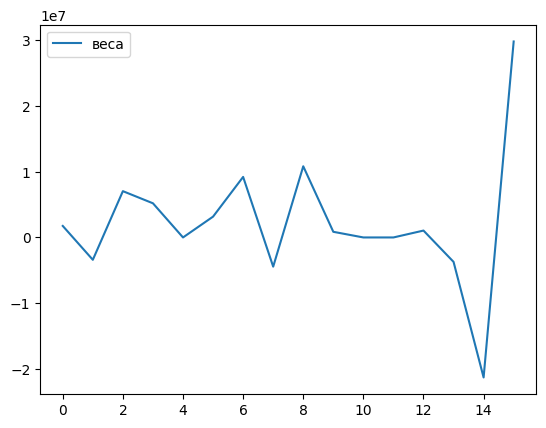

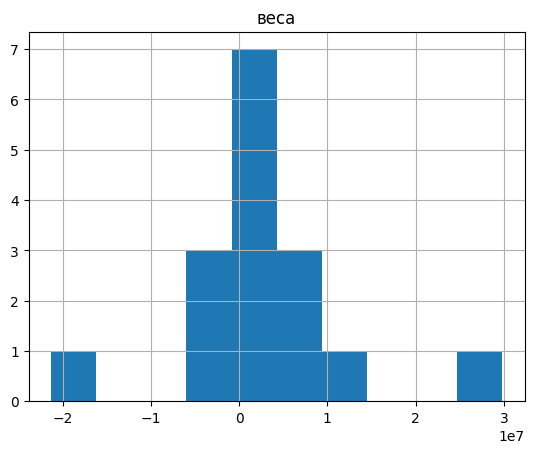

In [152]:
weights_lasso.plot()
weights_lasso.hist()

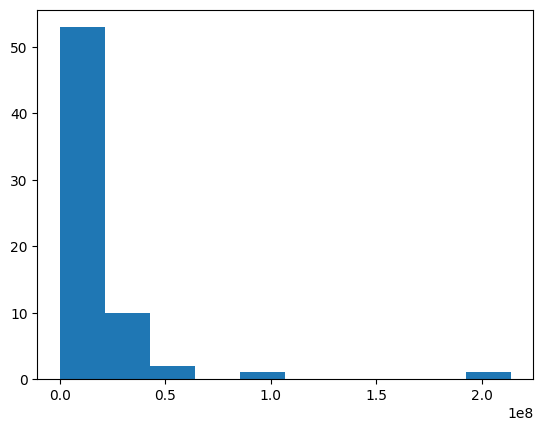

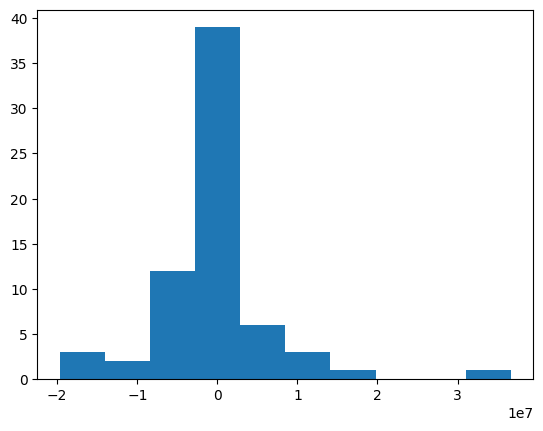

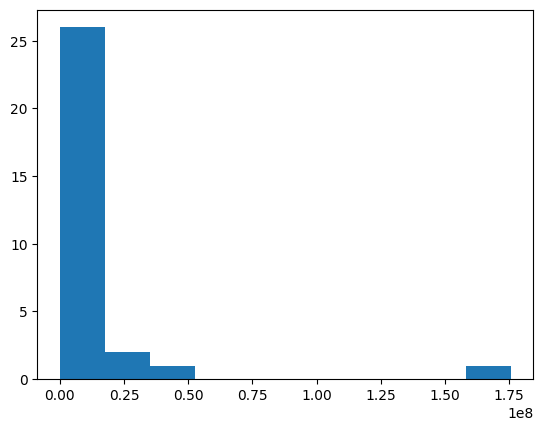

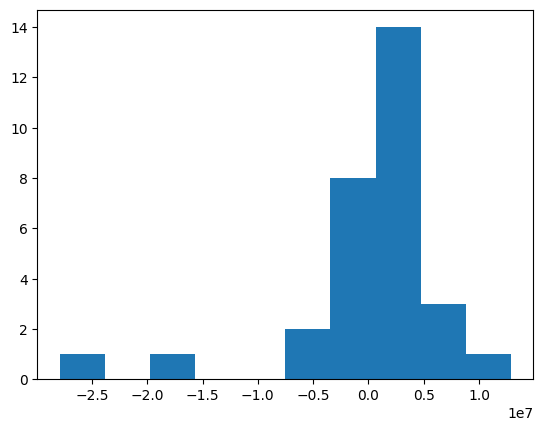

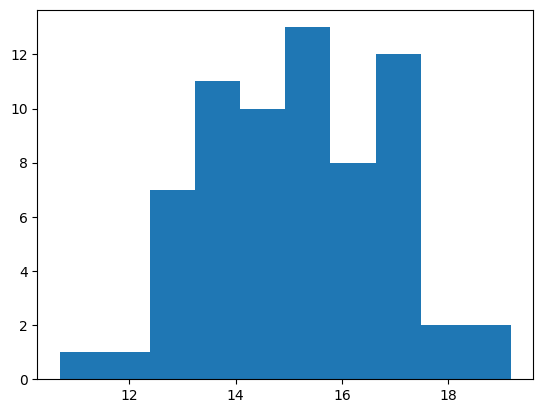

In [153]:
plt.hist((Y_train), bins=10)
plt.show()

plt.hist((Y_train-preds_train), bins=10)
plt.show()

plt.hist((Y_test), bins=10)
plt.show()

plt.hist((Y_test-preds_test), bins=10)
plt.show()

# Целевая переменная зависит от признака по экспоненциальному закону.  Диаграмма остатков сильно смещена.
# Чтобы исправить ситуацию, можем прологарифмировать Y

plt.hist(np.log(Y_train[Y_train != 0]), bins=10)
plt.show()

## Метод Ridge

In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

### Гипер параметры
#random_state = 0
#random_state = 42
random_state = 23643
test_size = 0.3
alpha = 0.25 # 0.9668 / 0.9486

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha=alpha) #определяем модель
model.fit(X_train_scaled, Y_train) #обучаем модель
preds_train = model.predict(X_train_scaled) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test_scaled) #делаем предсказание для тестовых данных

print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train)) #находим значение МАЕ для обучающей выборки
print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))#находим значение МАЕ для тестовой выборки
print('R^2 train:  ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))
r2_score_train_ridge = r2_score(Y_train, preds_train)
r2_score_test_ridge = r2_score(Y_test, preds_test)
print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

weights_data = {"веса":model.coef_,\
                "признаки": X_train.columns}
weights = pd.DataFrame(weights_data)
#print(weights.sort_values("веса"))
print(weights)

weights_ridge = weights

Ошибка на обучении: 4472196.318480445
Ошибка на тесте: 4013340.0376093504
R^2 train:   0.9400192334221891
R^2 test:   0.9486905074837482
Число активных признаков: 16 / 16
            веса                    признаки
0   1.490121e+06           Основные средства
1  -7.249184e+06         Фин вложения (1170)
2   6.656258e+06                      Запасы
3   5.864047e+06   Дебиторская задолженность
4  -4.758956e+05         Фин вложения (1240)
5   3.353754e+06           Денежные средства
6   1.083491e+07                    Раздел 3
7  -4.663538e+06     Заемные средства (1410)
8   1.773946e+07     Заемные средства (1510)
9   4.480556e+06  Кредиторская задолженность
10 -5.814804e+06                      Баланс
11  4.805991e+06                     Выручка
12 -2.443272e+06               Себестоимость
13 -6.774053e+06           Прибыль от продаж
14 -1.973662e+07  Прибыль до налогооблажения
15  2.961242e+07              Чистая прибыль


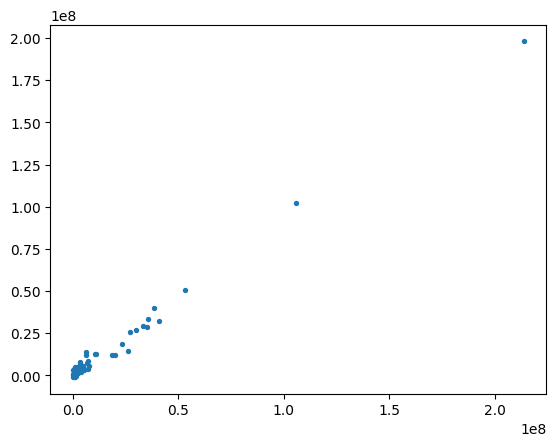

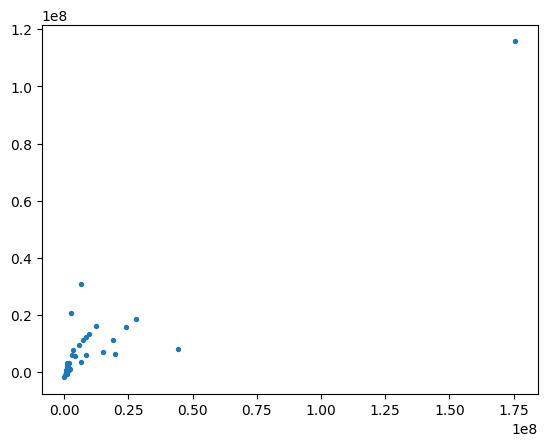

In [212]:
# Предсказания на трейне
plt.scatter(Y_train, preds_train, s=8)
plt.show()

# Предсказания на тесте
plt.scatter(Y_test, preds_test, s=8)
plt.show()

## XGBoost

In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

### Гипер параметры
#random_state = 0
random_state = 42
#random_state = 23643
test_size = 0.3
alpha = 0.25 # 0.9668 / 0.9486

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10) #определяем модель
model.fit(X_train_scaled, Y_train) #обучаем модель
preds_train = model.predict(X_train_scaled) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test_scaled) #делаем предсказание для тестовых данных

print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train)) #находим значение МАЕ для обучающей выборки
print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))#находим значение МАЕ для тестовой выборки
print('R^2 train:  ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))
r2_score_train_xgb = r2_score(Y_train, preds_train)
r2_score_test_xgb = r2_score(Y_test, preds_test)

#print("Число активных признаков:", sum(model.coef_!=0), "/", model.coef_.shape[0])

#weights_data = {"веса":model.coef_, "признаки": X_train.columns}
#weights = pd.DataFrame(weights_data)
##print(weights.sort_values("веса"))
#print(weights)

#weights_xgb = weights

Ошибка на обучении: 145853.734375
Ошибка на тесте: 7652441.5
R^2 train:   0.9999434351921082
R^2 test:   0.7299339771270752


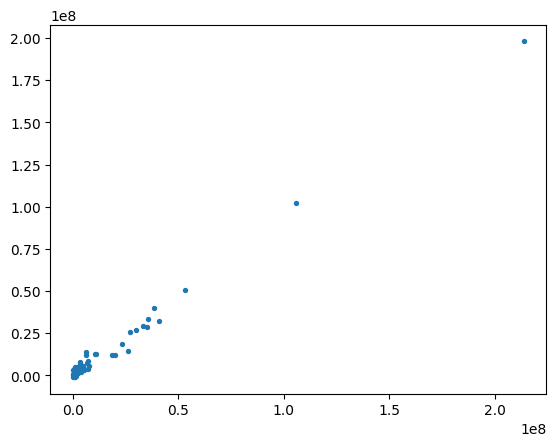

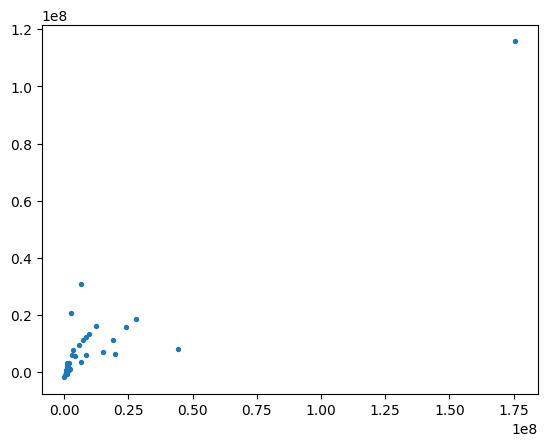

In [213]:
# Предсказания на трейне
plt.scatter(Y_train, preds_train, s=8)
plt.show()

# Предсказания на тесте
plt.scatter(Y_test, preds_test, s=8)
plt.show()

## CatBoost

In [185]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor

### Гипер параметры
#random_state = 0
random_state = 42
#random_state = 23643
test_size = 0.3
alpha = 0.25 # 0.9668 / 0.9486

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=3, loss_function='RMSE') #определяем модель
model.fit(X_train_scaled, Y_train) #обучаем модель
preds_train = model.predict(X_train_scaled) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test_scaled) #делаем предсказание для тестовых данных

print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train)) #находим значение МАЕ для обучающей выборки
print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))#находим значение МАЕ для тестовой выборки
print('R^2 train:  ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))
r2_score_train_cat = r2_score(Y_train, preds_train)
r2_score_test_cat = r2_score(Y_test, preds_test)


0:	learn: 29892536.0096183	total: 780us	remaining: 780ms
1:	learn: 29819312.7843041	total: 1.44ms	remaining: 717ms
2:	learn: 29745905.8720961	total: 2.03ms	remaining: 674ms
3:	learn: 29652518.7710372	total: 2.57ms	remaining: 640ms
4:	learn: 29574465.4619060	total: 3.12ms	remaining: 622ms
5:	learn: 29489340.4543378	total: 3.66ms	remaining: 607ms
6:	learn: 29432952.3554743	total: 4.2ms	remaining: 595ms
7:	learn: 29339896.2300809	total: 4.79ms	remaining: 594ms
8:	learn: 29255424.8892233	total: 5.37ms	remaining: 591ms
9:	learn: 29156481.3074957	total: 5.91ms	remaining: 585ms
10:	learn: 29085413.1601218	total: 11.2ms	remaining: 1.01s
11:	learn: 29012167.9355584	total: 11.8ms	remaining: 968ms
12:	learn: 28926845.0504030	total: 12.3ms	remaining: 935ms
13:	learn: 28834118.0306740	total: 12.8ms	remaining: 904ms
14:	learn: 28755312.3550905	total: 13.4ms	remaining: 879ms
15:	learn: 28660260.4283673	total: 13.9ms	remaining: 856ms
16:	learn: 28606045.4896058	total: 14.5ms	remaining: 837ms
17:	learn

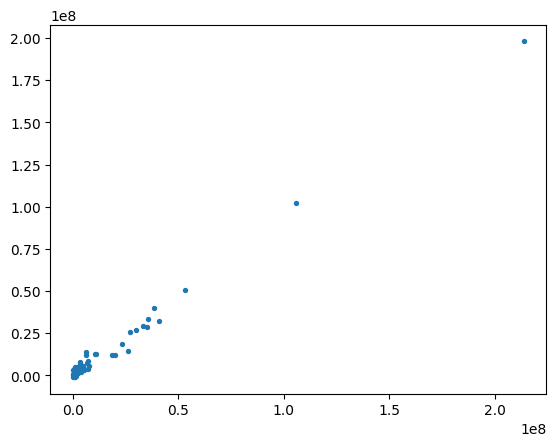

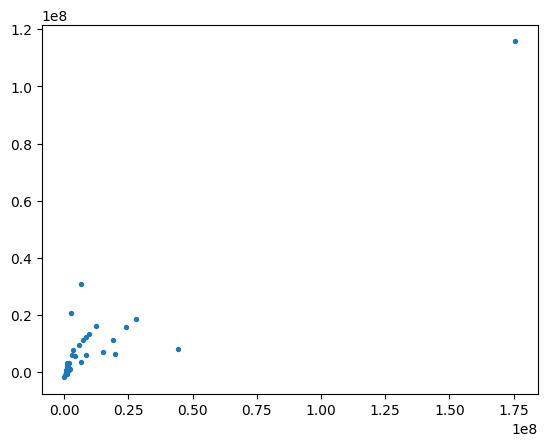

In [214]:
# Предсказания на трейне
plt.scatter(Y_train, preds_train, s=8)
plt.show()

# Предсказания на тесте
plt.scatter(Y_test, preds_test, s=8)
plt.show()

In [188]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для поиска
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=CatBoostRegressor(loss_function='RMSE'), param_grid=param_grid, cv=3)

# Поиск лучших параметров
grid_search.fit(X_train, Y_train)

# Лучшие параметры
print(f'Best parameters: {grid_search.best_params_}')

# Лучшая модель
best_model = grid_search.best_estimator_

Выходные данные были обрезаны до нескольких последних строк (5000).
1:	learn: 34956744.6428634	total: 3.93ms	remaining: 1.96s
2:	learn: 34860202.8826569	total: 4.94ms	remaining: 1.64s
3:	learn: 34763687.5793247	total: 5.98ms	remaining: 1.49s
4:	learn: 34667648.7869613	total: 10.5ms	remaining: 2.08s
5:	learn: 34579614.0937381	total: 11.5ms	remaining: 1.9s
6:	learn: 34488900.4957476	total: 14.2ms	remaining: 2.02s
7:	learn: 34364425.9366732	total: 15.2ms	remaining: 1.89s
8:	learn: 34272324.1219647	total: 19.6ms	remaining: 2.16s
9:	learn: 34178418.5780288	total: 20.6ms	remaining: 2.04s
10:	learn: 34084197.8767545	total: 21.6ms	remaining: 1.94s
11:	learn: 33995377.7954537	total: 22.5ms	remaining: 1.85s
12:	learn: 33901345.8777622	total: 32.5ms	remaining: 2.47s
13:	learn: 33802430.7444563	total: 34ms	remaining: 2.4s
14:	learn: 33709431.6202456	total: 35.5ms	remaining: 2.33s
15:	learn: 33626044.6567835	total: 36.5ms	remaining: 2.25s
16:	learn: 33523771.7447227	total: 38.9ms	remaining: 2.25s
1

## Результаты

array([[<Axes: title={'center': 'веса'}>]], dtype=object)

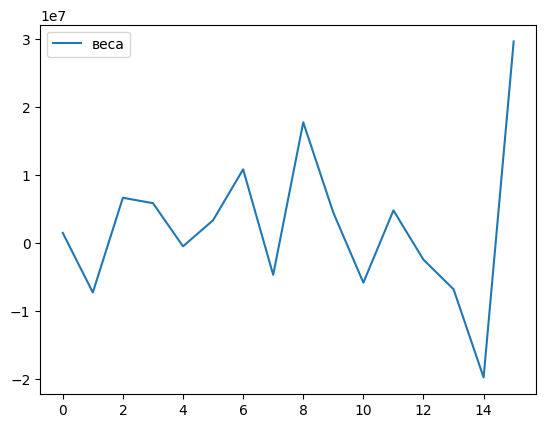

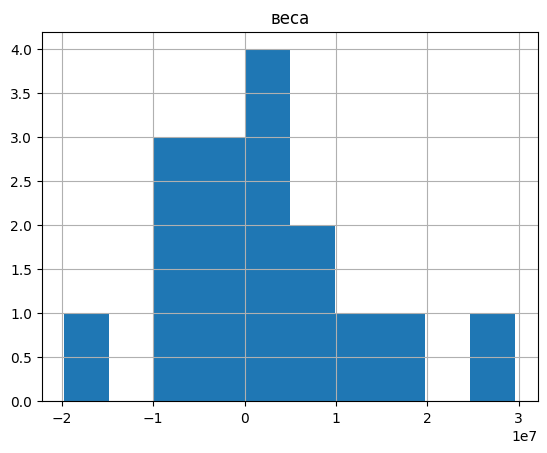

In [156]:
weights_ridge.plot()
weights_ridge.hist()

Text(0, 0.5, 'Вес')

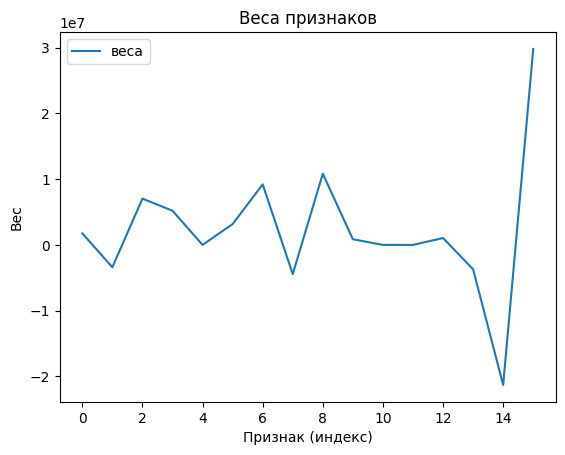

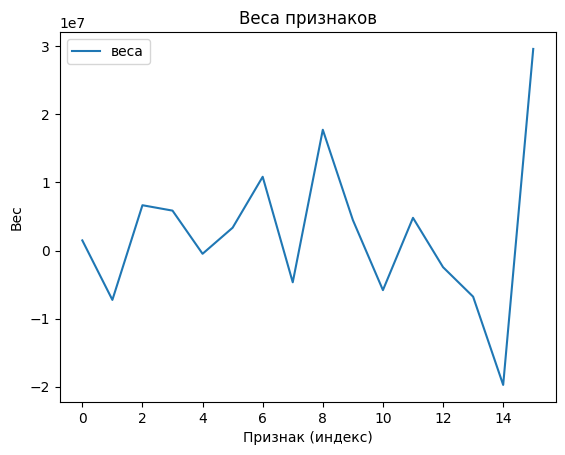

In [157]:
weights_lasso.plot()
plt.title("Веса признаков")
plt.xlabel('Признак (индекс)')
plt.ylabel('Вес')

weights_ridge.plot()
plt.title("Веса признаков")
plt.xlabel('Признак (индекс)')
plt.ylabel('Вес')


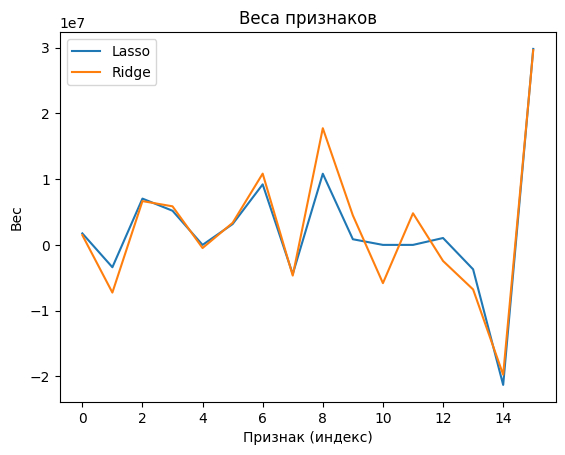

In [158]:
plt.plot('веса', label='Lasso', data=weights_lasso)
plt.plot('веса', label='Ridge', data=weights_ridge)
plt.title("Веса признаков")
plt.xlabel('Признак (индекс)')
plt.ylabel('Вес')
plt.legend()
plt.show()